# Data Analysis - Lab 2
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [67]:
# coding: utf-8

import data
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from scipy import stats
from math import sqrt,pi,exp

<br/>
<br/>

___
# Exercice A - Multivariate data set : Fisher Iris
In this exercice, we study the Iris data set.
#### Question 1 - Open iris.csv as a matrice

We use the comma separator because we saw in the text editor that the data was separated
by commas.

In [4]:
dataframe = pd.read_csv("data/iris.csv")
print(dataframe.shape)

dataframe.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,51,35,14,2
1,49,30,14,2
2,47,32,13,2
3,46,31,15,2
4,50,36,14,2


/Users/Pierre/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


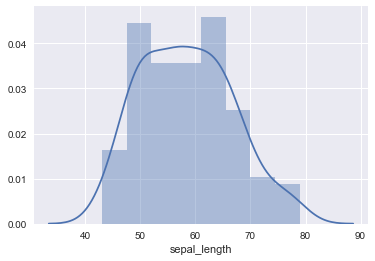

/Users/Pierre/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


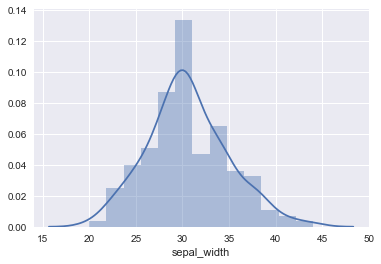

/Users/Pierre/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


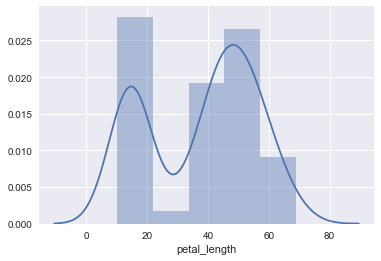

/Users/Pierre/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


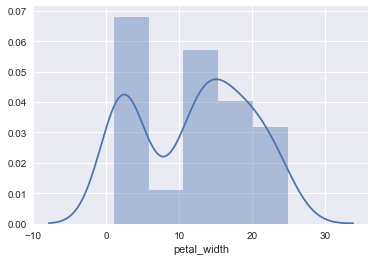

In [71]:
#dataframe.hist()
for column in dataframe : 
    sns.distplot(dataframe[column]) 
    plt.show()

In [6]:
dataframe.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null int64
sepal_width     150 non-null int64
petal_length    150 non-null int64
petal_width     150 non-null int64
dtypes: int64(4)
memory usage: 4.8 KB


In [8]:
covMatrix = np.zeros((4, 4))
corrMatrix = np.zeros((4, 4))

In [23]:
def cov(a, b):
    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)
    return np.sum((a-a_mean)*(b-b_mean))/(len(a)-1)

for i in range(dataframe.shape[1]):
    for j in range(dataframe.shape[1]):
        y= cov(dataframe.iloc[: , i],dataframe.iloc[: , j])
        covMatrix[i][j]=y
        corrMatrix[i][j]= covMatrix[i][j]/(np.std(dataframe.iloc[: , i]) * np.std(dataframe.iloc[: , j]))
print(covMatrix)
print(corrMatrix)


[[ 68.56935123  -4.24340045 127.43154362  51.62706935]
 [ -4.24340045  18.99794183 -32.96563758 -12.16393736]
 [127.43154362 -32.96563758 311.62778523 129.5609396 ]
 [ 51.62706935 -12.16393736 129.5609396   58.1006264 ]]
[[1.0067114093959735 -0.11835884308691481 0.877604472369043
  0.8234306640317878]
 [-0.11835884308691481 1.0067114093959733 -0.431315541272355
  -0.3685831535601736]
 [0.877604472369043 -0.431315541272355 1.0067114093959713
  0.9693276155061697]
 [0.8234306640317878 -0.3685831535601736 0.9693276155061697
  1.006711409395973]]


In [10]:
dataframe.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,68.569351,-4.243400,127.431544,51.627069
sepal_width,-4.243400,18.997942,-32.965638,-12.163937
petal_length,127.431544,-32.965638,311.627785,129.560940
petal_width,51.627069,-12.163937,129.560940,58.100626


In [11]:
dataframe.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


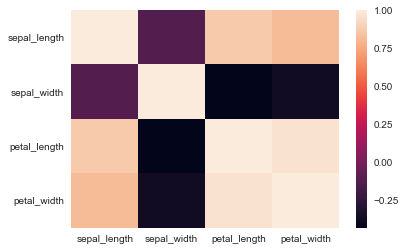

In [72]:
sns.heatmap(dataframe.corr())

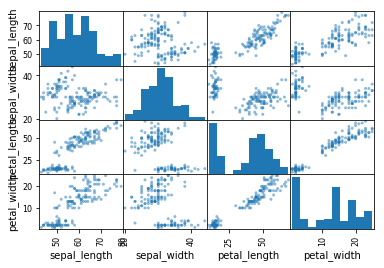

In [25]:
corrMatrix = pd.plotting.scatter_matrix(dataframe)
plt.show()

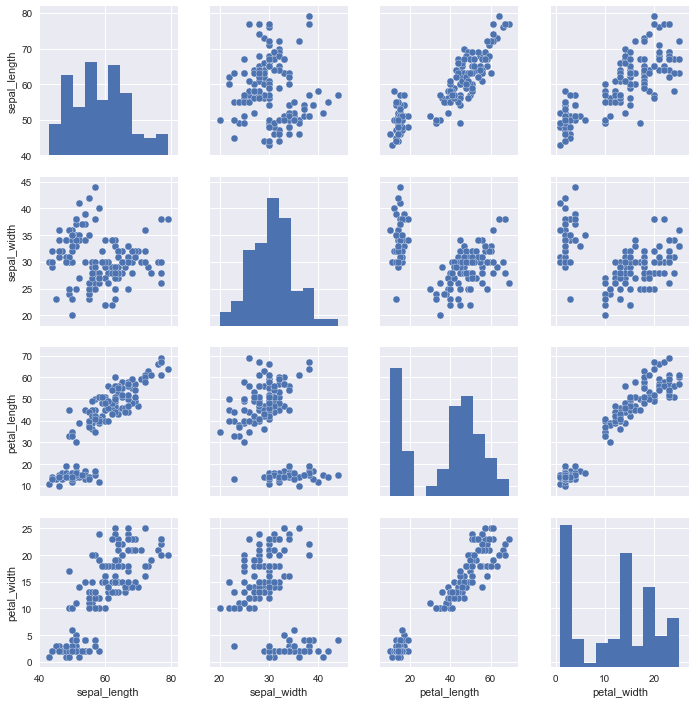

In [73]:
sns.pairplot(dataframe)

In [66]:
print(type(dataframe.shape[1]))
def IC95(a,b):
    ic_matrice = np.zeros((2,0))
    r = cov(a,b)
    Z = np.log(abs(1 + r)) - np.log(abs(1 - r))/2
    sz = sqrt(1/(len(a) - 3))
    Zinf = Z - 1.96*sz
    Zsup = Z + 1.96*sz
    ic_matrice = [(exp(2*Zinf) - 1)/(exp(2*Zinf) + 1), (exp(2*Zsup) - 1)/(exp(2*Zsup) + 1)]

    return ic_matrice  
print(IC95(dataframe.values[:,1],dataframe.values[:,2]))

<class 'int'>
[0.9121755942585484, 0.9530144763847588]


In [84]:
#JE SAIS PAS DU TOUT SI C'EST BON JE PENSE PAS QUE L'ON DOIT EN AVOIR 9 ???
for i in range(1,dataframe.shape[1]):
    for j in range(1,dataframe.shape[1]):
        print(IC95(dataframe.values[:,i],dataframe.values[:,j]))
   

[0.8829159854833208, 0.9369118660560256]
[0.9121755942585484, 0.9530144763847588]
[0.7452966279081373, 0.8579714537100529]
[0.9121755942585484, 0.9530144763847588]
[0.9912556688180015, 0.9954101034313687]
[0.9793735406706247, 0.9891423969978295]
[0.7452966279081373, 0.8579714537100529]
[0.9793735406706247, 0.9891423969978295]
[0.955822556970907, 0.9766135632728377]
